In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
X,y_true = make_blobs(n_samples=500, centers=3, cluster_std=0.60, random_state=42)

In [5]:
df=pd.DataFrame(X, columns=['Feature_1','Feature_2'])

In [6]:
df

,Feature_1,Feature_2
0,-6.190063,-7.302015
1,3.021747,1.940593
2,5.953761,1.488191
3,-2.744463,8.136177
4,5.360607,1.728324
...,...,...
495,-6.040014,-6.325329
496,-2.555459,9.218977
497,4.438408,2.974583
498,-7.193261,-6.250704


In [7]:
scaler=StandardScaler()
X_scaled = scaler.fit_transform(df)

# kmeans clustering

In [11]:
# only use X in cluster since y not needed
# intertia is wcss and k range is number of cluster here to check cuve in elbow
inertia= []
K_range = range(1,11)

In [12]:
for k in K_range:
    kmeans=KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

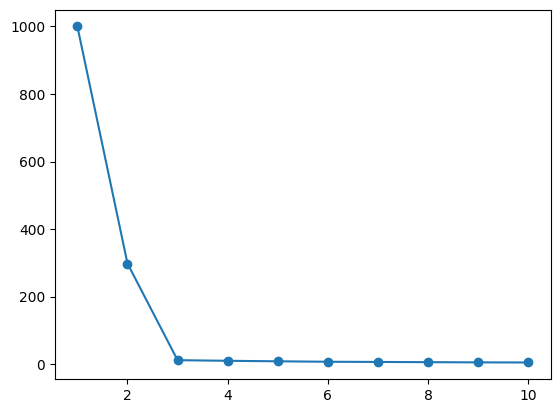

In [13]:
plt.plot(K_range, inertia , marker='o')

In [14]:
# final k means with 3 cluster points
kmeans_final = KMeans(n_clusters=3, random_state=42)

In [15]:
cluster_labels=kmeans_final.fit_predict(X_scaled)

In [16]:
#got 3 clusters
cluster_labels

array([1, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 2, 2, 2, 0, 0, 2, 1, 1, 2, 0, 2,
       0, 1, 1, 0, 0, 1, 1, 2, 0, 2, 2, 2, 0, 0, 0, 0, 1, 1, 0, 2, 2, 2,
       2, 0, 0, 0, 0, 1, 1, 2, 1, 1, 0, 2, 2, 1, 0, 1, 1, 2, 0, 1, 0, 1,
       0, 1, 2, 0, 0, 0, 0, 1, 2, 1, 2, 0, 2, 2, 1, 2, 0, 2, 1, 1, 1, 1,
       0, 2, 1, 0, 2, 0, 0, 1, 2, 2, 2, 1, 0, 2, 2, 1, 1, 2, 2, 1, 2, 1,
       1, 1, 1, 1, 1, 0, 2, 1, 0, 1, 2, 2, 0, 0, 1, 0, 2, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 2, 1, 1, 0, 0, 1, 1, 1, 2, 2, 2, 0, 1, 0, 0,
       2, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 2, 2, 0, 1, 1, 1, 2, 2, 1, 1, 2,
       2, 0, 0, 0, 2, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 2, 0, 2, 2,
       1, 0, 2, 2, 1, 1, 0, 1, 0, 2, 2, 1, 1, 0, 1, 2, 2, 1, 2, 1, 2, 0,
       0, 2, 1, 2, 0, 2, 2, 1, 0, 0, 0, 0, 2, 1, 1, 1, 2, 0, 2, 0, 0, 0,
       2, 2, 1, 1, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 1, 2, 1, 2, 2, 2, 1, 2,
       0, 0, 0, 2, 0, 0, 2, 2, 0, 1, 2, 2, 2, 2, 1, 1, 2, 0, 2, 2, 1, 2,
       0, 1, 0, 0, 1, 2, 2, 2, 1, 2, 1, 0, 0, 2, 0,

In [18]:
df['cluster']=cluster_labels

<Axes: xlabel='Feature_1', ylabel='Feature_2'>

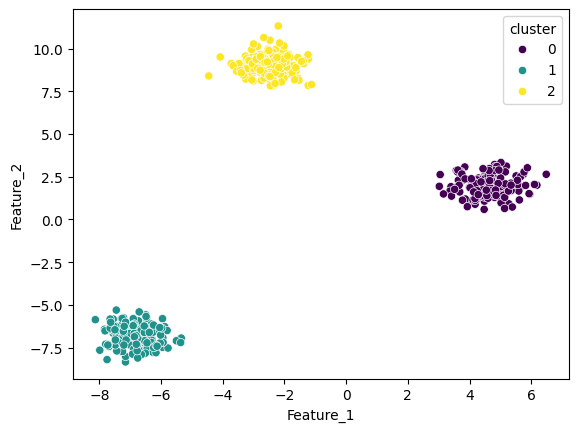

In [19]:
sns.scatterplot(x=df['Feature_1'],
               y=df['Feature_2'],
               hue=df['cluster'],
               palette='viridis')

In [21]:
from sklearn.datasets import make_moons

In [22]:
X,y_true=make_moons(n_samples=500, noise =0.05, random_state=42)

In [23]:
from sklearn.cluster import KMeans , DBSCAN

In [24]:
df=pd.DataFrame(X, columns=['Feature_1','Feature_2'])

In [25]:
scaler=StandardScaler()
X_scaled = scaler.fit_transform(df)

In [26]:
kmeans=KMeans(n_clusters=2, random_state=42)
kmeans_labels=kmeans.fit_predict(X_scaled)

In [27]:
df['kmeans_cluster']=kmeans_labels

<Axes: xlabel='Feature_1', ylabel='Feature_2'>

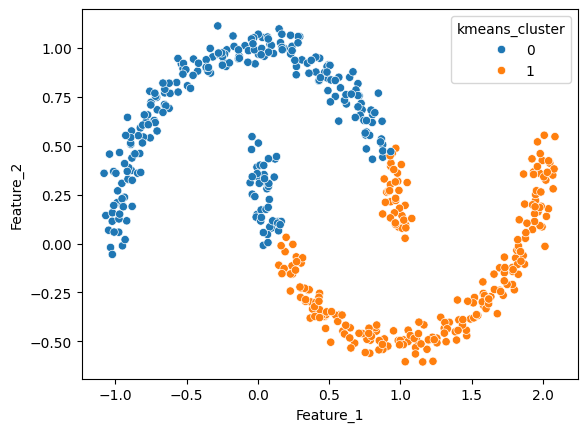

In [28]:
sns.scatterplot(x=df['Feature_1'], y=df['Feature_2'], hue=df['kmeans_cluster'], palette='tab10')

# DBscan

In [29]:
dbscan=DBSCAN(eps=0.3, min_samples=5)
dbscan_labels=dbscan.fit_predict(X_scaled)

In [30]:
df['dbscan_cluster']=dbscan_labels

<Axes: xlabel='Feature_1', ylabel='Feature_2'>

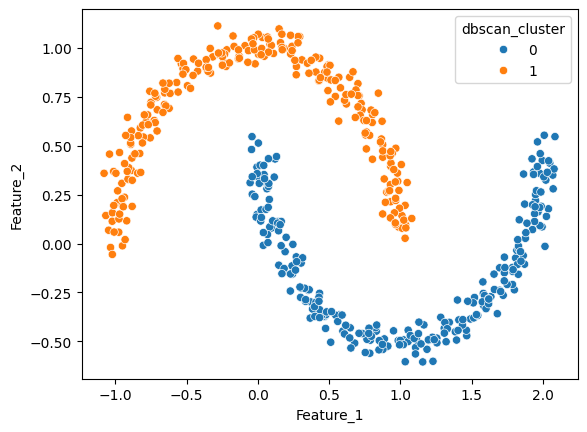

In [31]:
sns.scatterplot(x=df['Feature_1'], y=df['Feature_2'], hue=df['dbscan_cluster'], palette='tab10')